In [1]:
import pandas as pd
import numpy as np

In [10]:
dos_scores_name = 'dos_data_scores.csv'
normal_scores_name = 'normal_data_scores.csv'
probe_scores_name = 'probe_data_scores.csv'
r2l_scores_name = 'r2l_data_scores.csv'
u2r_scores_name = 'u2r_data_scores.csv'

In [11]:
data1 = pd.read_csv(dos_scores_name)
data1.describe(percentiles=[.01, .05, .1, .2, .3, .4, .5, .6, .7, .8, .9, .95, .99])

,scores
count,391458.000000
mean,3493.983923
std,4195.790311
min,5.888148
1%,235.883691
5%,437.579932
10%,1544.019983
20%,1687.235010
30%,1705.896240
40%,1710.303711


In [12]:
data2 = pd.read_csv(normal_scores_name)
data2.describe(percentiles=[.1, .2, .3, .4, .5, .6, .7, .8, .9, .95, .99])

,scores
count,9728.000000
mean,54.919189
std,435.628812
min,2.005563
10%,3.378231
20%,3.715585
30%,4.053908
40%,4.803758
50%,7.547349
60%,15.131821


In [13]:
data3 = pd.read_csv(probe_scores_name)
data3.describe(percentiles=[.1, .2, .3, .4, .5, .6, .7, .8, .9])

,scores
count,4.107000e+03
mean,9.646904e+04
std,6.055407e+06
min,1.833979e+01
10%,2.847812e+02
20%,4.168214e+02
30%,4.477263e+02
40%,6.945305e+02
50%,1.171984e+03
60%,1.191993e+03


In [14]:
data4 = pd.read_csv(r2l_scores_name)
data4.describe(percentiles=[.1, .2, .3, .4, .5, .6, .7, .8, .9])

,scores
count,1126.000000
mean,2247.423225
std,5645.833340
min,29.230988
10%,37.552975
20%,39.857624
30%,42.428373
40%,46.889477
50%,58.259306
60%,690.223450


In [15]:
data5 = pd.read_csv(u2r_scores_name)
data5.describe(percentiles=[.1, .2, .3, .4, .5, .6, .7, .8, .9])

,scores
count,52.000000
mean,3533.175967
std,3776.653081
min,34.066620
10%,38.050782
20%,201.123773
30%,454.120050
40%,684.270142
50%,4056.381226
60%,5099.063477


In [16]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
df_scores = pd.concat([data2, data5], ignore_index=True)
true_label = pd.DataFrame([1]*len(data2)+[0]*len(data5))
print(len(true_label),len(df_scores))

9780 9780


In [37]:
fpr, tpr, thresholds = roc_curve(true_label, df_scores, pos_label=0)
print(fpr[0])
print(tpr[0])
print(thresholds[0])

0.0
0.0
25025.13671875


In [38]:
t = np.array(thresholds)
print(t.max())
print(t.min())

25025.13671875
2.005563259124756


In [39]:
roc_auc = auc(fpr, tpr)

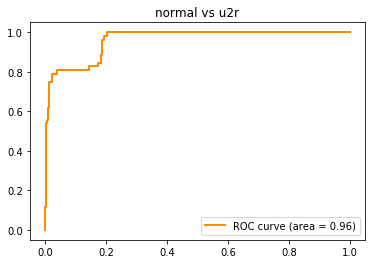

In [40]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.title('normal vs u2r')
plt.legend(loc="best")

average_precision:0.48822952127909086


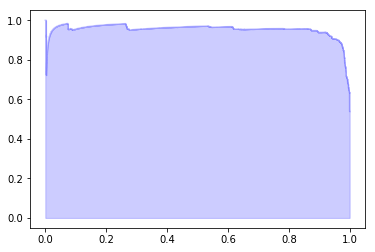

In [23]:
precision, recall, _ = precision_recall_curve(true_label, df_scores, pos_label=0)
average_precision = average_precision_score(true_label, df_scores)
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')
print('average_precision:{}'.format(average_precision))

In [24]:
auc(recall, precision)

0.9531211564228997